## **Mobile price prediction using Auto-Sklearn**

### **Context**
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [1]:
# import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive 

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Importing dataset 

path  = '/content/drive/MyDrive/Auto-ML/mobile.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
df.isnull().values.any()

False

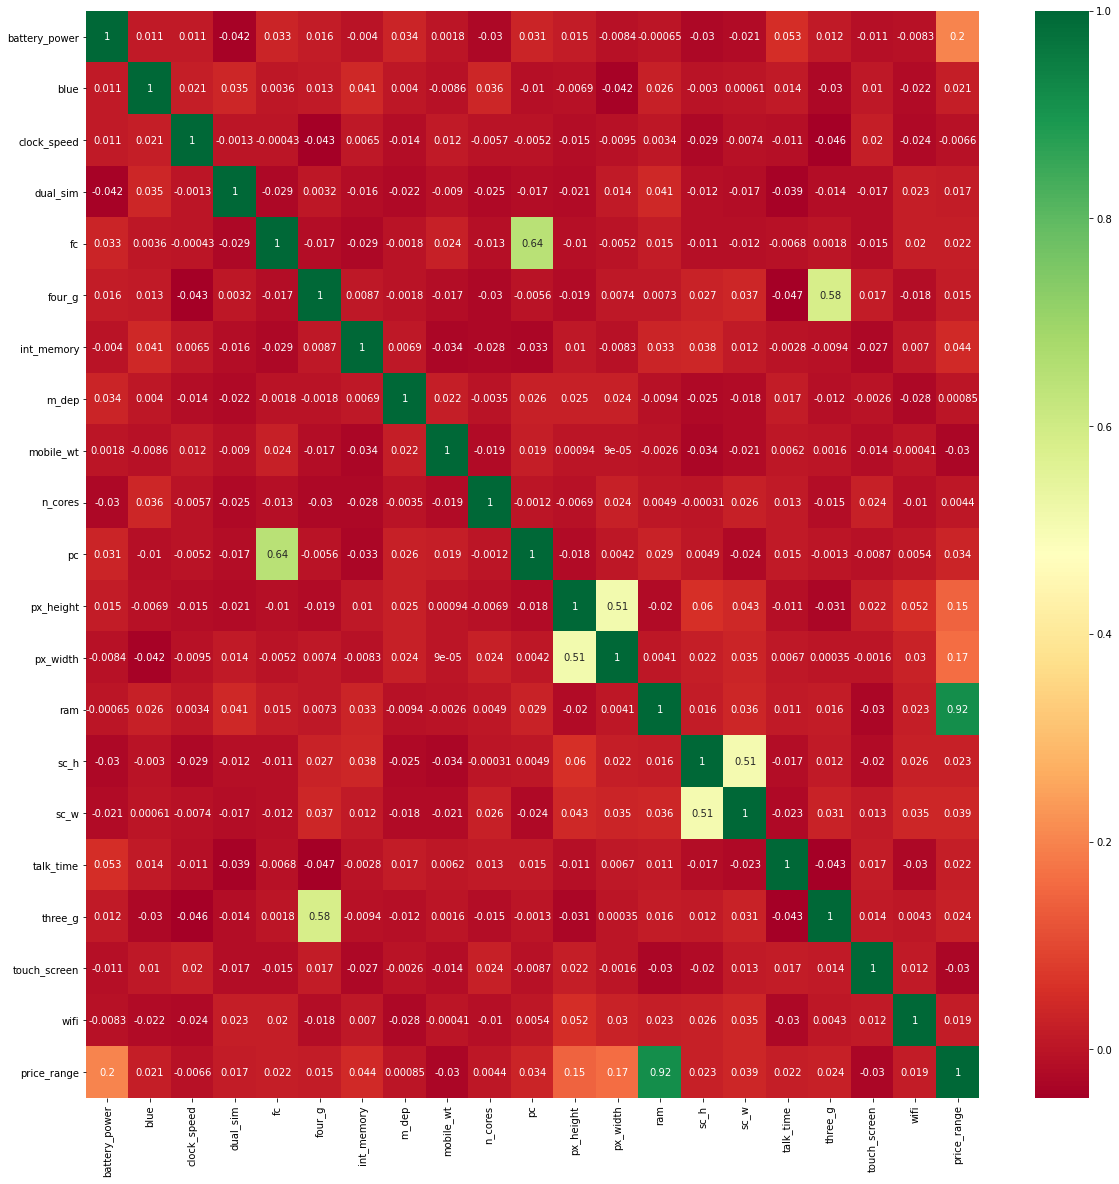

In [11]:
# # Now let's check for corelation 

Corr = df.corr()
top_corr = Corr.index
plt.figure(figsize=(20,20))

g = sns.heatmap(df[top_corr].corr(), annot=True, cmap='RdYlGn')

 Our target values are price range 
 
 the columns which are in dark green colur these are highly corelated 
 
 we can see that ram and price_range is highly corelated 
 
 let's create a jointplot for ram and pricerange

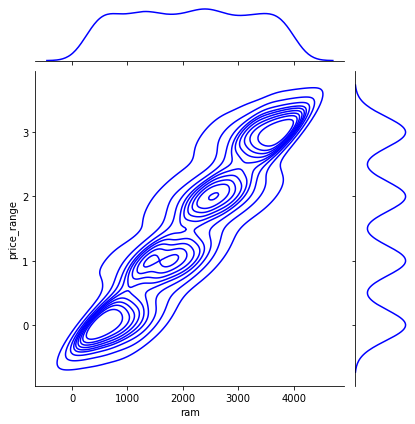

In [12]:
# RAM VS PRICE

sns.jointplot(x='ram', y='price_range', data=df, color='blue', kind='kde')

We can see that as the ram increases price of the mobile is also increasing 
so for low ram mobile price is also low and for high price low the ram is high 

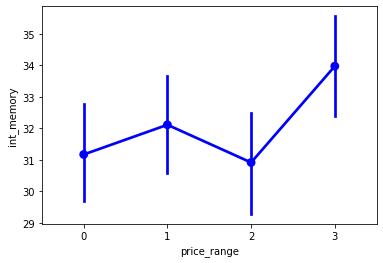

In [13]:
# Now let's craete plot for internal memory vs price 

sns.pointplot(y='int_memory', x='price_range', data=df, color='blue')

so as the internal memory increases price is also increasing 

sometime for highprice and low price mobile the internal memory is same 

internal memory is also corelated with price but it depends on some other factor also unlike ram . if ram is increasing price is also increasing 
but in case of internal memory price is always not increasing 

In [14]:
# bateery vs price

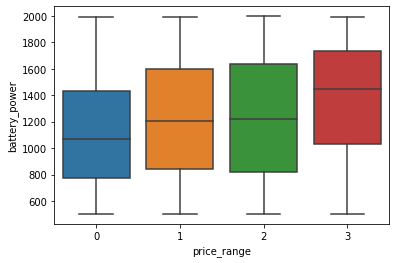

In [15]:
sns.boxplot(x='price_range', y='battery_power', data=df)

we can see that price  is also  depend on battery power

In [16]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


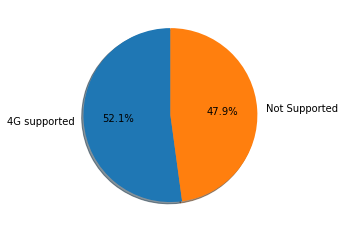

In [17]:
#percentage of mobiles which support four_g( 4G)
labels4g = ['4G supported', 'Not Supported']
values4g = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels= labels4g, autopct='%1.1f%%', shadow=True, startangle= 90)
plt.show()

In [18]:
# So we have 52% mobiles which supports 4G
# and 47% mobiles which does not support 4G

Text(0.5, 0, 'MegaPixels')

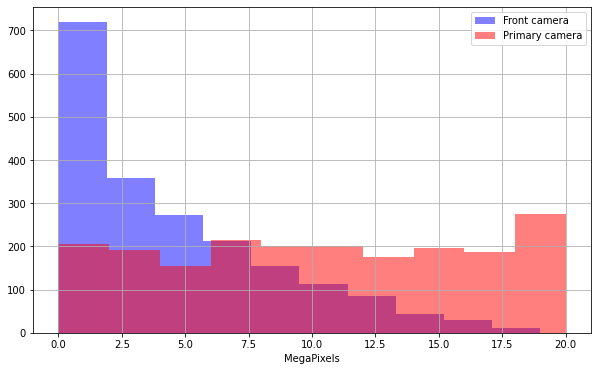

In [19]:
# No of Mobiles vs Camera MP of Front and Primary camera
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

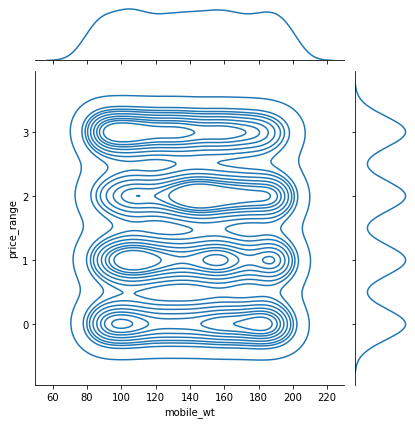

In [20]:
#Mobile weight vs Price
sns.jointplot(x='mobile_wt', y='price_range', data=df, kind='kde')

In [21]:
# It is not that much corelated 

Let's create Auto Sklearn model 

In [22]:
#seperate X and Y from dataset
X= df.drop('price_range', axis=1)
Y= df['price_range']

In [23]:
#split train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state= 42)

In [24]:
#install Auto Sklearn
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   209  100   209    0     0   2296      0 --:--:-- --:--:-- --:--:--  2322


In [25]:
import autosklearn.regression

model = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=120, per_run_time_limit=30)

In [26]:
model.fit(X_train, Y_train)

AutoSklearnRegressor(per_run_time_limit=30, time_left_for_this_task=120)

In [27]:
print("Auto Sklearn Model Accuracy: {:.2f}%".format(model.score(X_test, Y_test)*100))

Auto Sklearn Model Accuracy: 95.44%


In [28]:
# It will take some more time because it is working on alot of lgorithm and parametrs

# as we can se that the accuracy is 95%

In [29]:
# Now let's check statistics of the model 

print(model.sprint_statistics())

auto-sklearn results:
  Dataset name: 87c5382c-e7f4-11eb-8718-0242ac1c0002
  Metric: r2
  Best validation score: 0.947637
  Number of target algorithm runs: 11
  Number of successful target algorithm runs: 5
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 3
  Number of target algorithms that exceeded the memory limit: 3



In [30]:
# Now let's print the model 

print(model.show_models)

<bound method AutoSklearnEstimator.show_models of AutoSklearnRegressor(per_run_time_limit=30, time_left_for_this_task=120)>


In [32]:
print(model.show_models)

<bound method AutoSklearnEstimator.show_models of AutoSklearnRegressor(per_run_time_limit=30, time_left_for_this_task=120)>
